In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
#matplotlib 인코딩
def setting_styles_basic() :
    rcParams['font.family'] = 'malgun Gothic'
    rcParams['axes.unicode_minus'] = False

In [7]:
#데이터 불러오기, 전처리
uh_dashboard=pd.read_csv('./uh_dashboard.csv')
uh_dashboard=uh_dashboard.set_index('업태구분명',drop=True, append=False, inplace=False, verify_integrity=False)
#그래프 입력 값
f_list=[] #빈도, 업태 수
l_list=[] #라벨 업태구분명
for i in uh_dashboard.index : #cnt 0인 업태명은 제외하고자 함
    if uh_dashboard['강남구'][i] > 0 :
        l_list.append(i)
        f_list.append(uh_dashboard['강남구'][i])
l_list

['고고(디스코)클럽',
 '관광호텔나이트(디스코)',
 '관광호텔나이트(카바레)',
 '기타',
 '단란주점',
 '룸살롱',
 '비어(바)살롱',
 '요정',
 '카바레']

구 이름 >>강서구


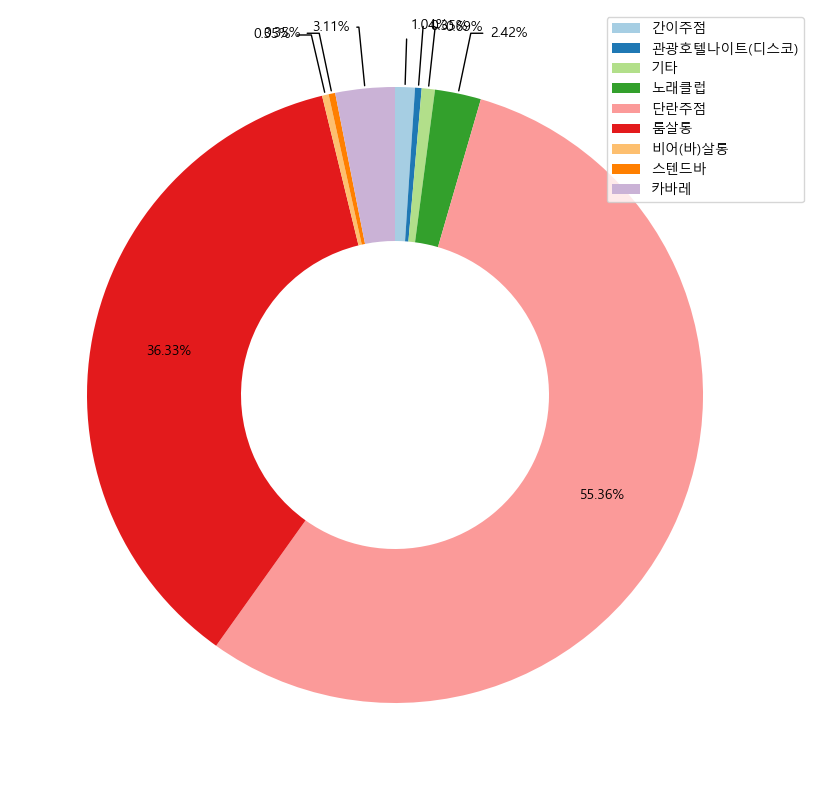

In [8]:
###########행정구별 유흥시설 현황 그래프##############

#데이터 불러오기, 전처리
uh_dashboard=pd.read_csv('./data/uh_dashboard.csv')
uh_dashboard=uh_dashboard.set_index('업태구분명',drop=True, append=False, inplace=False, verify_integrity=False)

#입력 값에 따라 대시보드 변경
gu_name=input('구 이름 >>')

#그래프 입력 값
f_list=[] #빈도, 업태 수
l_list=[] #라벨 업태구분명
for i in uh_dashboard.index : #cnt 0인 업태명은 제외하고자 함
    if uh_dashboard[gu_name][i] > 0 :
        l_list.append(i)
        f_list.append(uh_dashboard[gu_name][i])

#한글 깨짐 방지 - 인코딩
setting_styles_basic()

## 데이터 준비
labels = l_list ## 라벨
frequency = f_list ## 빈도 
fig = plt.figure(figsize=(10,10)) ## 캔버스 생성

total = np.sum(frequency) ## 빈도수 합
size=0.5
threshold = 5 ## 상한선 비율
sum_pct = 0 ## 퍼센티지

#차트 컬러 지정
cmap = plt.get_cmap('Paired')
chart_colors = cmap(np.array([0,1,2,3,4,5,6,7,8,9,10,11]))

fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성 
pie = ax.pie(frequency, ## 파이차트 출력
             colors=chart_colors, #그래프 색
             startangle=90, ## 시작점을 90도(degree)로 지정
             counterclock=False, ## 시계 방향으로 그린다.
             wedgeprops=dict(width=size) ## 중간의 반지름 0.5만큼 구멍을 뚫어준다.
            )


bbox_props = dict(boxstyle='square',fc='w',ec='w',alpha=0) ## annotation 박스 스타일

## annotation 설정
config = dict(arrowprops=dict(arrowstyle='-'),bbox=bbox_props,va='center')
for i,l in enumerate(labels):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 ## 파이의 시작 각도와 끝 각도
    center, r = ax.patches[i].center, ax.patches[i].r ## 원의 중심 좌표와 반지름길이
    if i < len(labels) - 1:
        sum_pct += float(f'{frequency[i]/total*100:.2f}')
        text = f'{frequency[i]/total*100:.2f}%'    
    else: ## 마지막 파이 조각은 퍼센티지의 합이 100이 되도록 비율을 조절
        text = f'{100-sum_pct:.2f}%'

     ## 비율 상한선보다 작은 것들은 Annotation으로 만든다.
    if frequency[i]/total*100 < threshold:
        ang = (ang1+ang2)/2 ## 중심각
        x = np.cos(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 x좌표
        y = np.sin(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 y좌표
        ## x좌표가 양수이면 즉 y축을 중심으로 오른쪽에 있으면 왼쪽 정렬
        ## x좌표가 음수이면 즉 y축을 중심으로 왼쪽에 있으면 오른쪽 정렬
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang) ## 시작점과 끝점 연결 스타일
        config["arrowprops"].update({"connectionstyle": connectionstyle}) ##
        ax.annotate(text, xy=(x, y), xytext=(1.5*x, 1.2*y),
                    horizontalalignment=horizontalalignment, **config)
    else:
        x = ((r*(1.5))/2)*np.cos(np.pi/180*((ang1+ang2)/2)) ## 텍스트 x좌표
        y = ((r*(1.5))/2)*np.sin(np.pi/180*((ang1+ang2)/2)) ## 텍스트 y좌표
        ax.text(x,y,text,ha='center',va='center',fontsize=10)

plt.legend(pie[0],labels, loc='upper right',bbox_to_anchor=(1.04,1)) ## 범례 표시
plt.show()
